# Stage 1 analysis; Long wavelength Spectroscopy

In [51]:
import sys, os, time                                                            
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from importlib import reload                                                    
import eureka.S1_detector_processing.s1_process as s1                                 
from eureka.lib import readECF as rd                                            
from eureka.lib import logedit                                                  
from eureka.lib import readECF as rd                                            
from eureka.lib import manageevent as me                                        
#from eureka.S1_data_reduction import optspex                                    
from eureka.lib import astropytable                                             
from eureka.lib import util   

plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 2

In [52]:
# Starts timer to monitor how long data reduction takes
t0      = time.time()

# Names the event (has to match the event name used for the *.ecf files)
eventlabel = 'wasp39b'                                                           

In [53]:
!ls 'dc-roof'

jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_SKIPJUMP.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_lin_corr.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_med_corr.fits


In [73]:
hdul = fits.open("dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_lin_corr.fits")#'dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_med_corr.fits')
#
hdul.info()

Filename: dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_lin_corr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     209   ()      
  1  SCI           1 ImageHDU        50   (512, 32, 3, 10)   float64   
  2  PIXELDQ       1 ImageHDU        11   (512, 32)   int32 (rescales to uint32)   
  3  GROUPDQ       1 ImageHDU        11   (512, 32, 3, 10)   uint8   
  4  ERR           1 ImageHDU        11   (512, 32, 3, 10)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [6414B]   


In [74]:
hdul[1].data

array([[[[-1.74647641e+01,  2.56588586e+01, -3.55468958e+00, ...,
           1.07447225e+01,  2.60732685e+01,  1.53745859e+00],
         [ 3.11808297e+01,  4.96964347e+00, -1.85999862e+00, ...,
          -1.01001078e+01,  3.62870460e+00, -1.07950176e+01],
         [ 3.59083326e+01,  6.06942467e+01, -6.51823975e+01, ...,
           4.72340170e+01, -1.70734277e+01, -6.63359738e+00],
         ...,
         [-9.34630526e+00,  5.98266502e+01,  3.64139713e+00, ...,
           3.19332422e+01,  3.05273499e+01,  1.24123716e+01],
         [ 2.29314906e+01,  2.17570640e+01,  4.24402141e+01, ...,
          -2.19021887e+01,  6.21335673e+01, -1.53995358e+01],
         [-2.70055572e+01, -4.83051980e+01, -6.25158518e+01, ...,
          -1.15407202e+01,  6.64685443e+01, -2.47585623e+01]],

        [[-3.25583007e+01,  2.28747677e+01,  3.22371951e+00, ...,
           3.94044095e+01,  2.33857685e+01,  9.18518583e+00],
         [ 1.67075118e+01,  1.18046875e+01,  1.44278730e+00, ...,
           1.22903056e

In [75]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-03-21T19:37:31.874' / UTC date file created                     
ORIGIN  = 'STScI   '           / Organization responsible for creating file     
FILENAME= 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp.fits' / Na
FILETYPE= 'countrate'          / Type of data in the file                       
SDP_VER = 'B7.0    '           / Data processing software version number        
CAL_VER = '1.3.3   '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '        

In [76]:
print(np.shape(hdul[1].data[:,:,1,:,]))

np.shape(hdul[1].data[:,:,:,:,])

(10, 3, 512)


(10, 3, 32, 512)

0
1
2
3
4
5
6
7
8
9


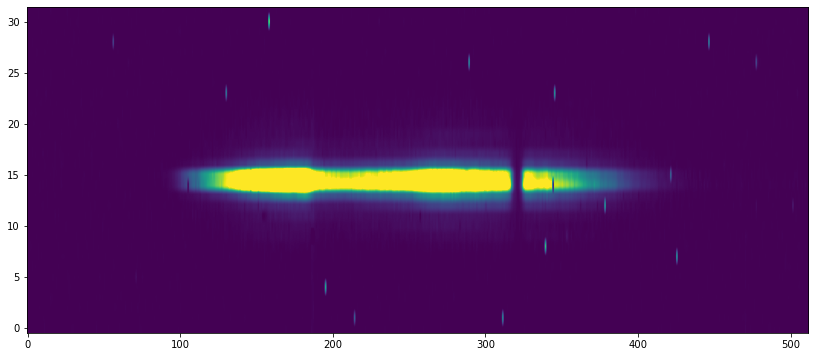

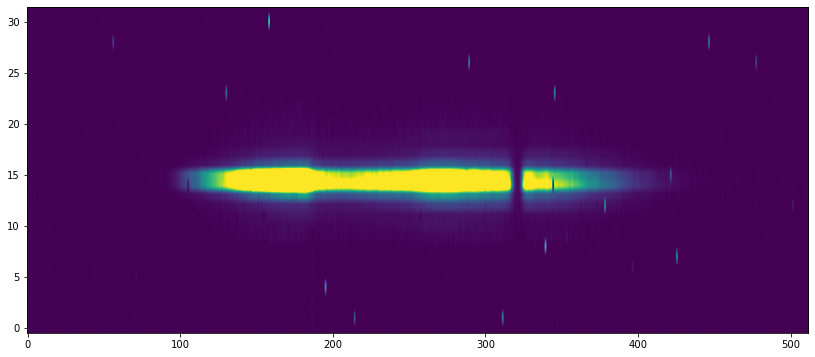

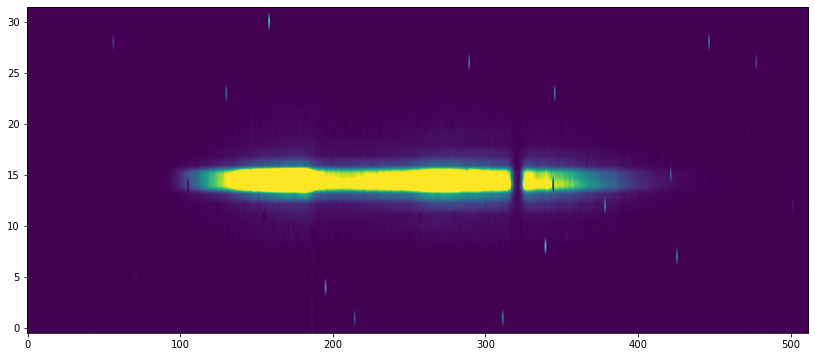

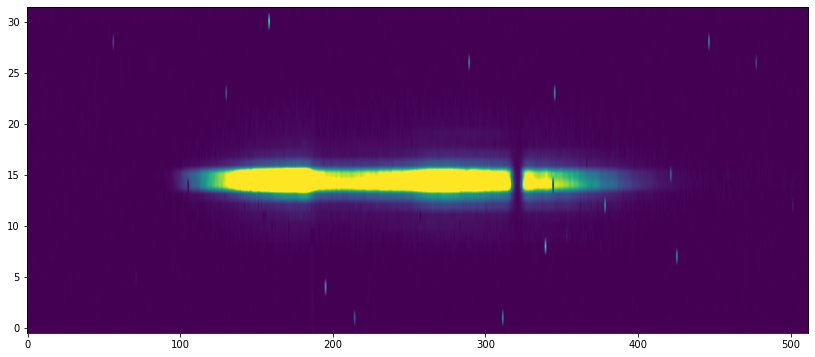

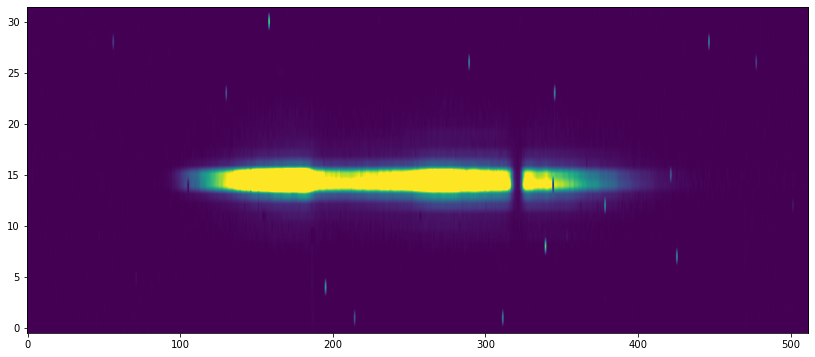

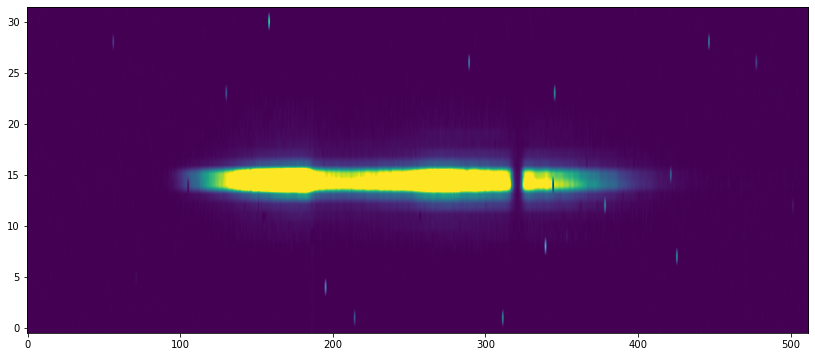

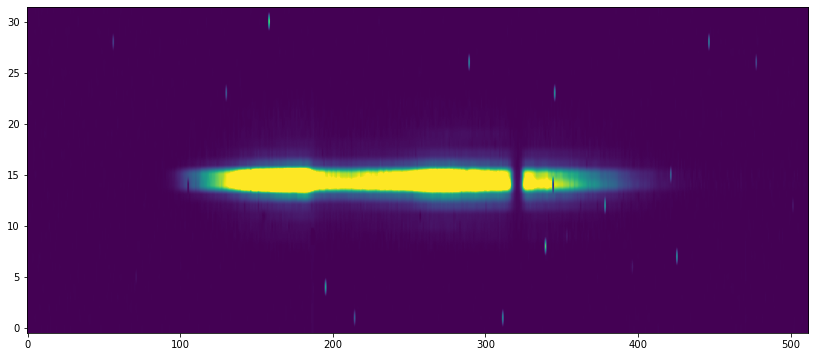

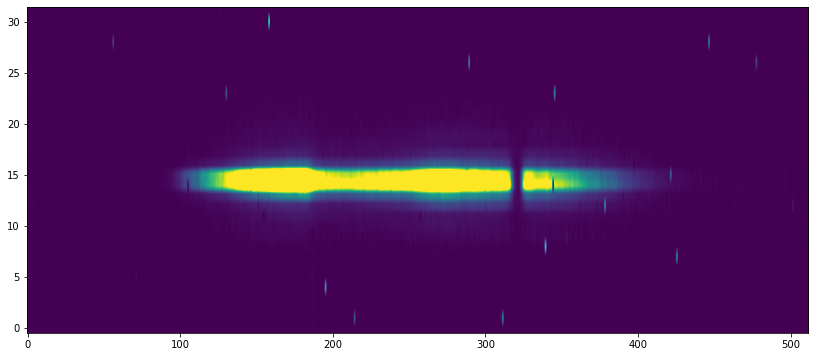

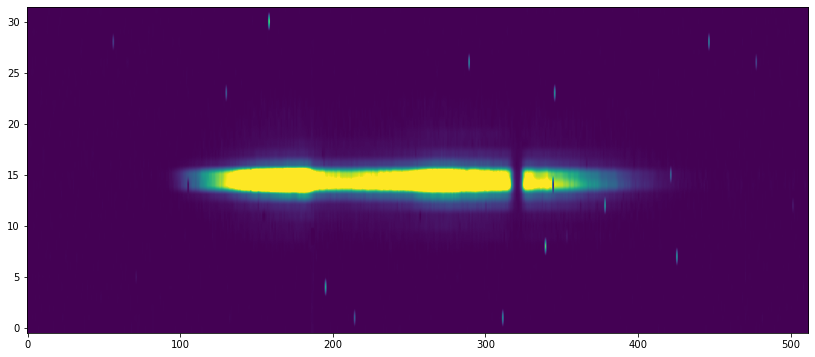

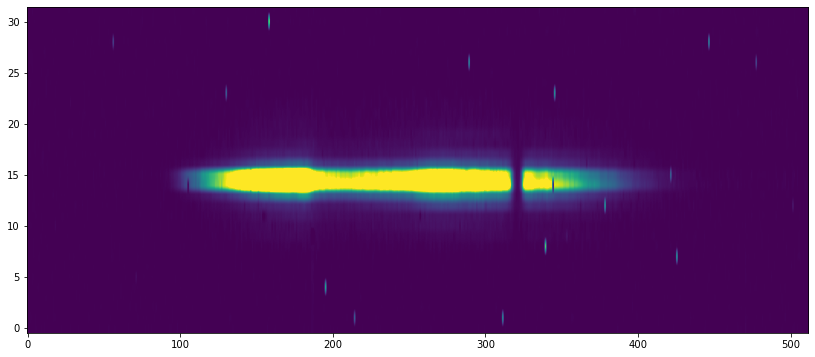

In [77]:
%matplotlib inline
for i in range(0, 10):
    print(i)
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    plt.imshow(hdul[1].data[i,1,:,:,], origin = 'lower', aspect='auto',  vmin=0, vmax=1e4)

In [78]:
# Sum the rows and columns for group 0

def row_col_counter(colsize, rowsize, group_num, integr_num):
    col_arrays = []
    col_values = np.zeros(colsize)

    for col_num in range(0, rowsize):
        for row_num in range(0,colsize):
            col_values[row_num] = hdul[1].data[integr_num,group_num,row_num,col_num]
        col_arrays.append(col_values.tolist())

    col_arrays_flat = [item for sublist in col_arrays for item in sublist]
    
    return col_arrays, np.array(col_arrays_flat)


In [79]:
colsize = hdul[0].header['SUBSIZE2']
rowsize = hdul[0].header['SUBSIZE1']

col_arrays0, col_arrays_flat0 = row_col_counter(colsize, rowsize, group_num=0, integr_num=0)
col_arrays1, col_arrays_flat1 = row_col_counter(colsize, rowsize, group_num=0, integr_num=1)
col_arrays2, col_arrays_flat2 = row_col_counter(colsize, rowsize, group_num=0, integr_num=2)
col_arrays3, col_arrays_flat3 = row_col_counter(colsize, rowsize, group_num=0, integr_num=3)
col_arrays4, col_arrays_flat4 = row_col_counter(colsize, rowsize, group_num=0, integr_num=4)
col_arrays5, col_arrays_flat5 = row_col_counter(colsize, rowsize, group_num=0, integr_num=5)
col_arrays6, col_arrays_flat6 = row_col_counter(colsize, rowsize, group_num=0, integr_num=6)
col_arrays7, col_arrays_flat7 = row_col_counter(colsize, rowsize, group_num=0, integr_num=7)
col_arrays8, col_arrays_flat8 = row_col_counter(colsize, rowsize, group_num=0, integr_num=8)
col_arrays9, col_arrays_flat9 = row_col_counter(colsize, rowsize, group_num=0, integr_num=9)

In [80]:
np.shape(hdul[1].data[:,0,:,:])

(10, 32, 512)

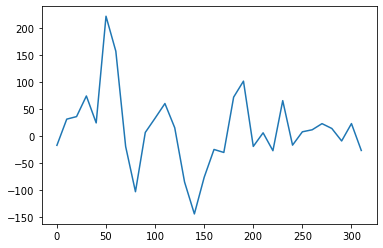

In [81]:
time_np = np.arange(0, 320, 10)
plt.plot(time_np, col_arrays0[0])

In [82]:
time_full = [time_np.copy()]
print(time_full)

for i in np.arange(1,rowsize):
    #print(i)
    #print(time_np.copy()+(120)+time_full[-1][-1])
    time_full.append(time_np.copy()+120+time_full[-1][-1])
    
    
time_full_flat = [item for sublist in time_full for item in sublist]
time_full_flat = np.array(time_full_flat)

[array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310])]


<IPython.core.display.Javascript object>


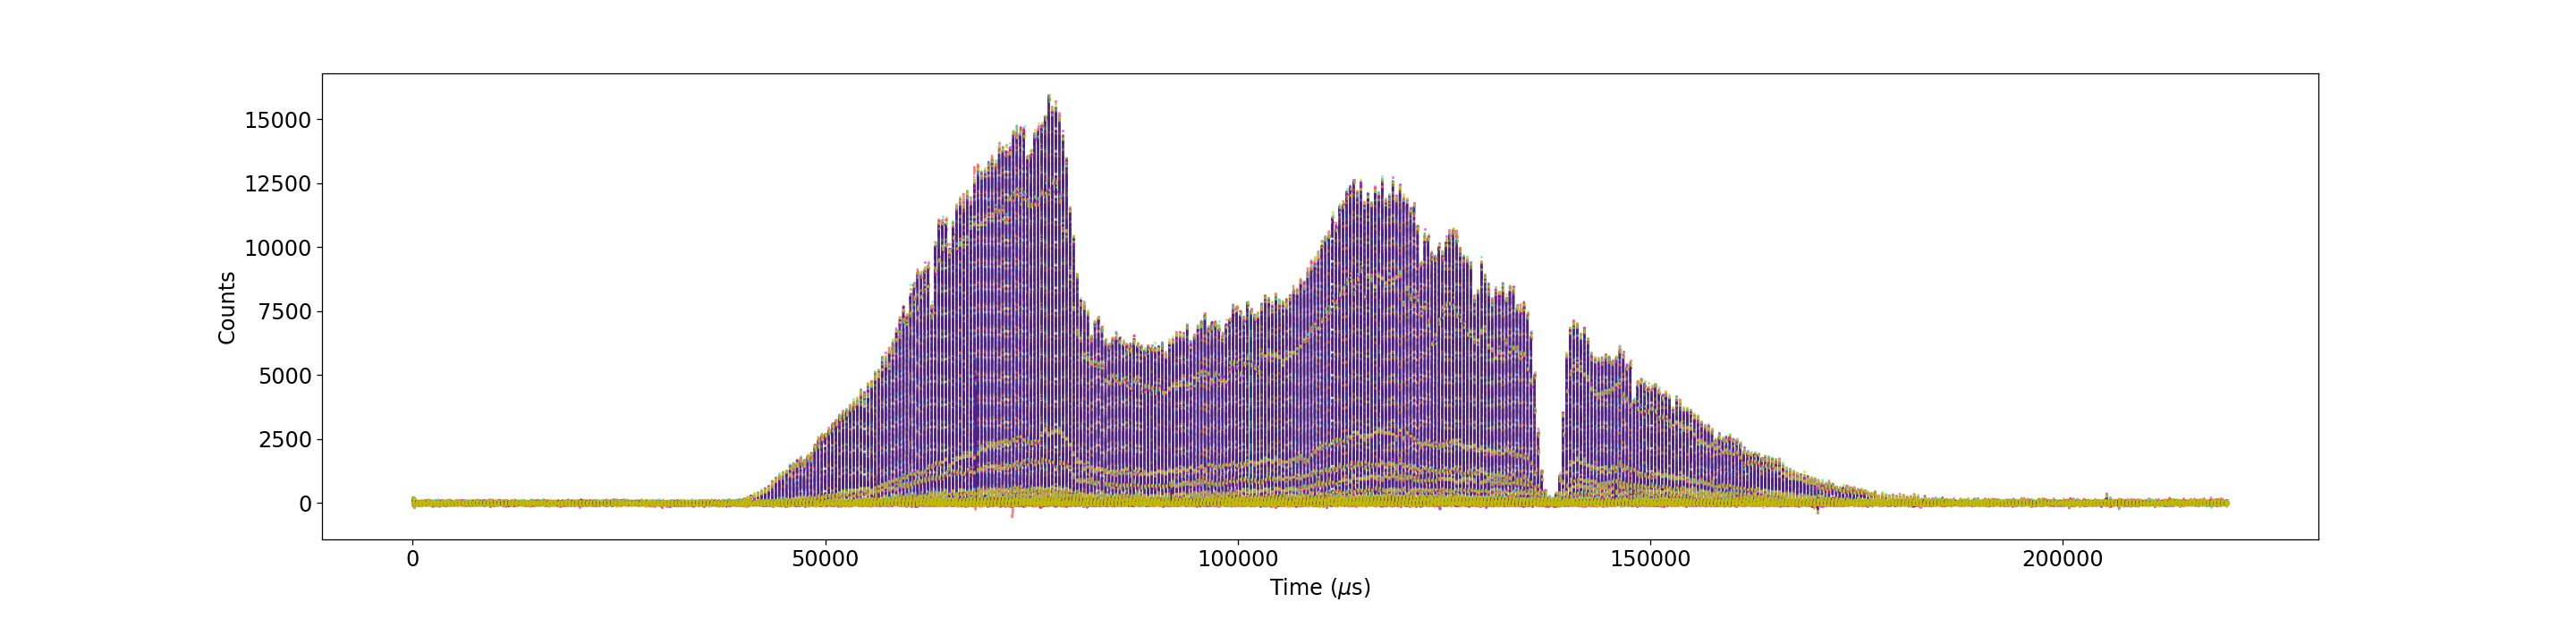

Text(0, 0.5, 'Counts')

In [83]:
# plot the ten different integrations
#%matplotlib inline
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(25, 6))

for i in np.arange(0, len(col_arrays0)):
    plt.plot(time_full[i], col_arrays0[i], "-.", color='k', alpha=0.5)
    plt.plot(time_full[i], col_arrays1[i], "-.", color='g', alpha=0.5)
    plt.plot(time_full[i], col_arrays2[i], "-.", color='r', alpha=0.5)
    plt.plot(time_full[i], col_arrays3[i], "-.", color='b', alpha=0.5)
    plt.plot(time_full[i], col_arrays4[i], ".", color='purple', alpha=0.5)
    plt.plot(time_full[i], col_arrays5[i], ".", color='lawngreen', alpha=0.5)
    plt.plot(time_full[i], col_arrays6[i], ".", color='fuchsia', alpha=0.5)
    plt.plot(time_full[i], col_arrays7[i], ".", color='turquoise', alpha=0.5)
    plt.plot(time_full[i], col_arrays8[i], ".", color='orange', alpha=0.5)
    plt.plot(time_full[i], col_arrays9[i], ".", color='y', alpha=0.5)
    #plt.xlim(0, 6000)
    #plt.ylim(-50, 400)
    
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Counts")

In [84]:
xmin = 40550
ymin = 180

xmax = 183500
ymax = 16000


def index_mask_finder(col_arrays_flat, ymin):
    indexes_keep = (np.array(col_arrays_flat0)<ymin).nonzero()[0]
    return indexes_keep

def masked_time_col(col_arrays_flat, ymin):
    indexes_keep = (np.array(col_arrays_flat)<ymin).nonzero()[0]
    return time_full_flat[index_mask_finder(col_arrays_flat, ymin)].tolist(), col_arrays_flat[index_mask_finder(col_arrays_flat, ymin)].tolist()


<IPython.core.display.Javascript object>


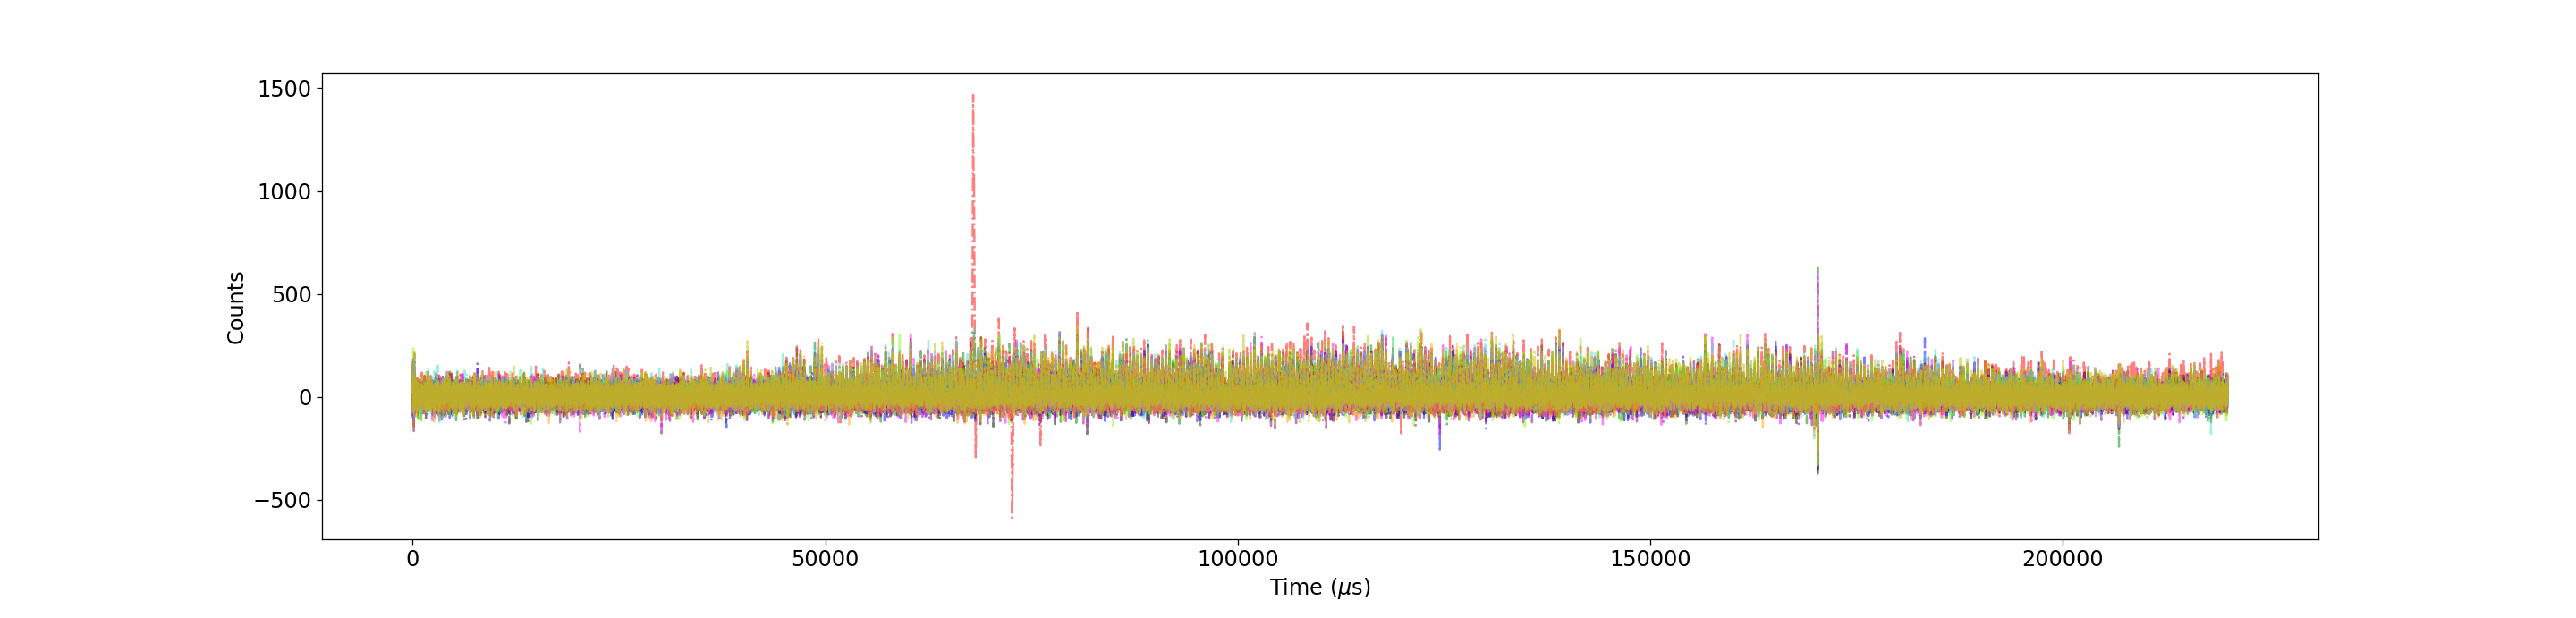

Text(0, 0.5, 'Counts')

In [85]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(25, 6))

plt.plot(time_full_flat[index_mask_finder(col_arrays_flat0, ymin)], 
         col_arrays_flat0[index_mask_finder(col_arrays_flat0, ymin)], "-.", color='k', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat1, ymin)], 
         col_arrays_flat1[index_mask_finder(col_arrays_flat1, ymin)], "-.", color='green', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat2, ymin)], 
         col_arrays_flat2[index_mask_finder(col_arrays_flat2, ymin)], "-.", color='r', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat3, ymin)], 
         col_arrays_flat3[index_mask_finder(col_arrays_flat3, ymin)], "-.", color='b', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat4, ymin)], 
         col_arrays_flat4[index_mask_finder(col_arrays_flat4, ymin)], "-.", color='purple', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat5, ymin)], 
         col_arrays_flat5[index_mask_finder(col_arrays_flat5, ymin)], "-.", color='lawngreen', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat6, ymin)], 
         col_arrays_flat6[index_mask_finder(col_arrays_flat6, ymin)], "-.", color='fuchsia', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat7, ymin)], 
         col_arrays_flat7[index_mask_finder(col_arrays_flat7, ymin)], "-.", color='turquoise', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat8, ymin)], 
         col_arrays_flat8[index_mask_finder(col_arrays_flat8, ymin)], "-.", color='orange', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat9, ymin)], 
         col_arrays_flat9[index_mask_finder(col_arrays_flat9, ymin)], "-.", color='y', alpha=0.5)
#plt.xlim(0, 6000)
#plt.ylim(-50, 400)
    
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Counts")

## extract masked times and column counts

In [86]:
masked_time0, maskedcol_arrays0 = masked_time_col(col_arrays_flat0, ymin)
masked_time1, maskedcol_arrays1 = masked_time_col(col_arrays_flat1, ymin)
masked_time2, maskedcol_arrays2 = masked_time_col(col_arrays_flat2, ymin)
masked_time3, maskedcol_arrays3 = masked_time_col(col_arrays_flat3, ymin)
masked_time4, maskedcol_arrays4 = masked_time_col(col_arrays_flat4, ymin)
masked_time5, maskedcol_arrays5 = masked_time_col(col_arrays_flat5, ymin)
masked_time6, maskedcol_arrays6 = masked_time_col(col_arrays_flat6, ymin)
masked_time7, maskedcol_arrays7 = masked_time_col(col_arrays_flat7, ymin)
masked_time8, maskedcol_arrays8 = masked_time_col(col_arrays_flat8, ymin)
masked_time9, maskedcol_arrays9 = masked_time_col(col_arrays_flat9, ymin)

all_masked_times = np.array([masked_time0, masked_time1, masked_time2, masked_time3, masked_time4, masked_time5,
                            masked_time6, masked_time7, masked_time8, masked_time9])
all_masked_cols = np.array([maskedcol_arrays0, maskedcol_arrays1, maskedcol_arrays2, maskedcol_arrays3, maskedcol_arrays4,
                            maskedcol_arrays5, maskedcol_arrays6, maskedcol_arrays7, maskedcol_arrays8, maskedcol_arrays9])
    

## Periodogram

In [87]:
%matplotlib inline
# import packages
from astropy.timeseries import LombScargle
from astropy.timeseries import TimeSeries
from astropy.table import Table
from astropy.time import Time
import astropy.units as u

min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062


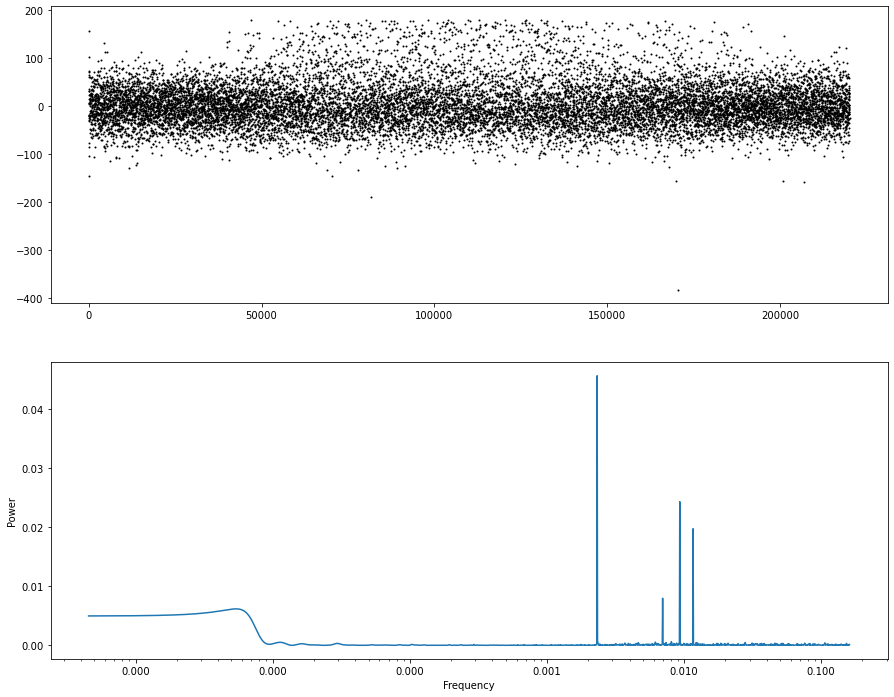

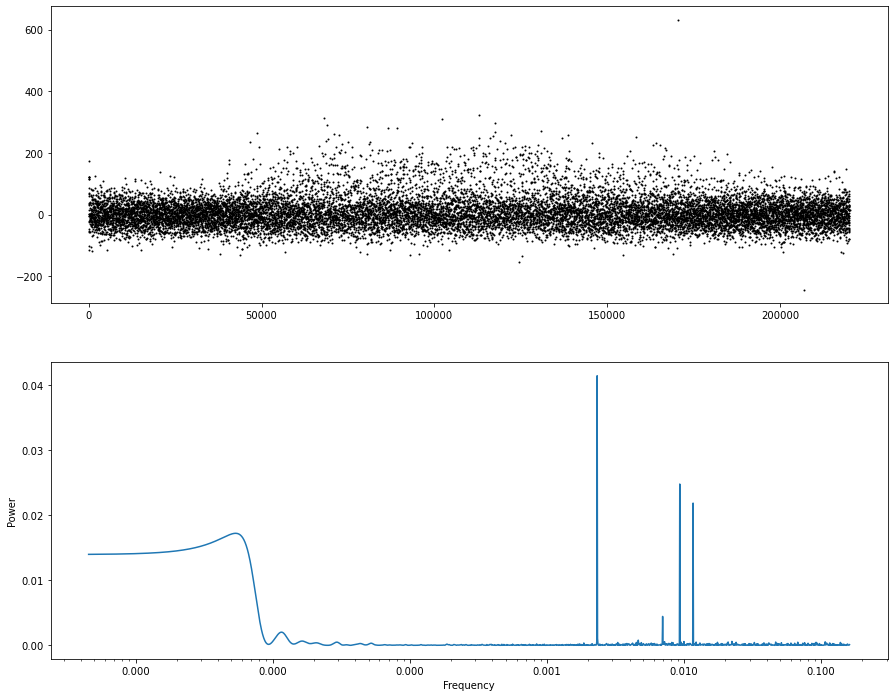

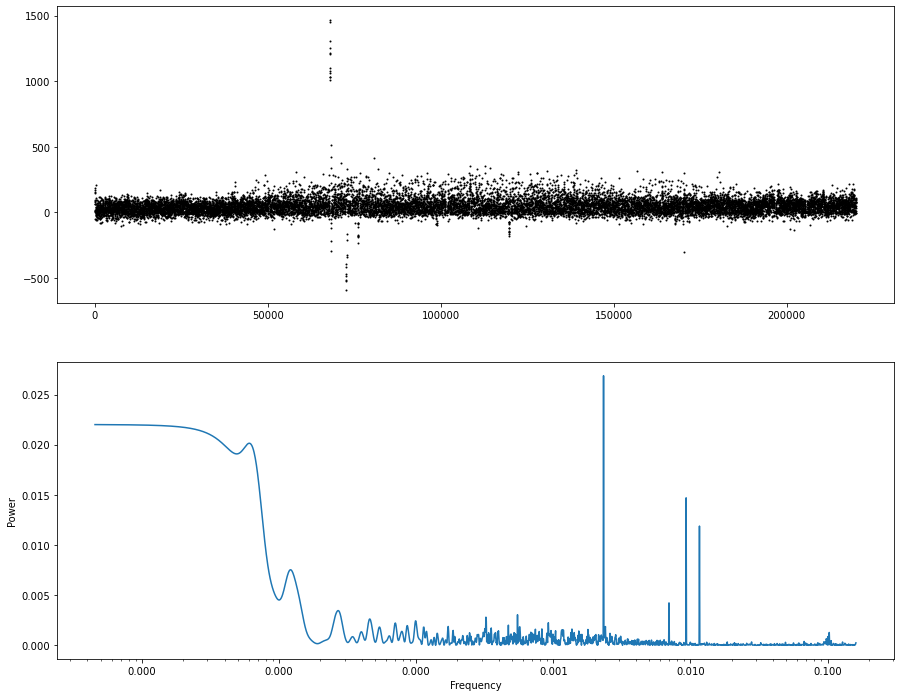

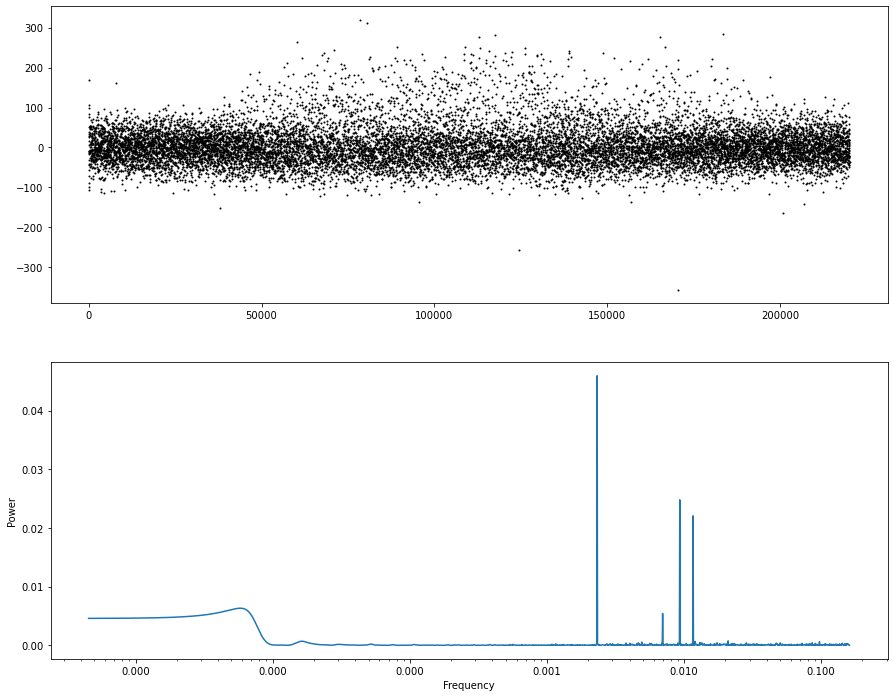

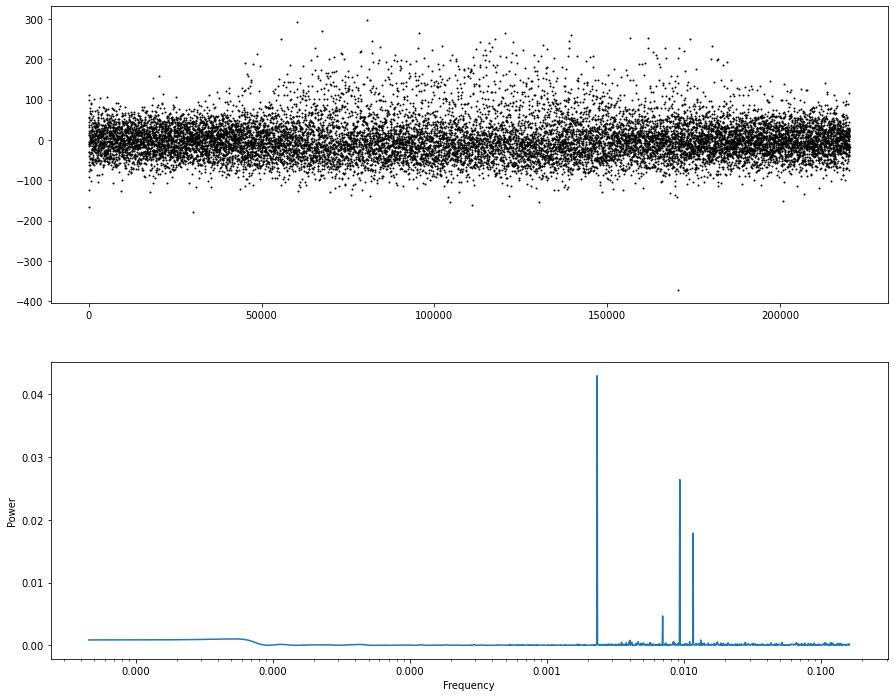

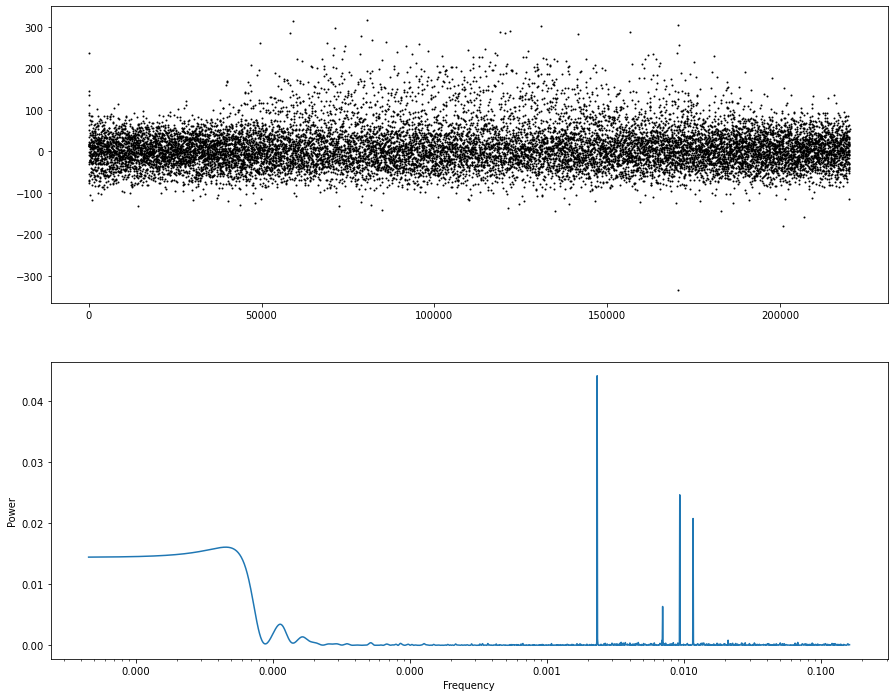

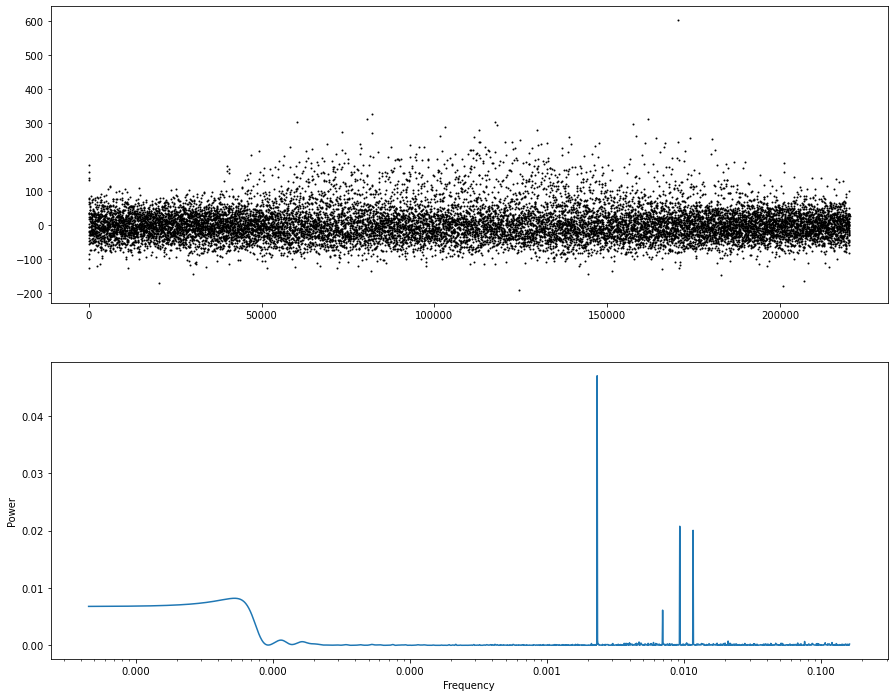

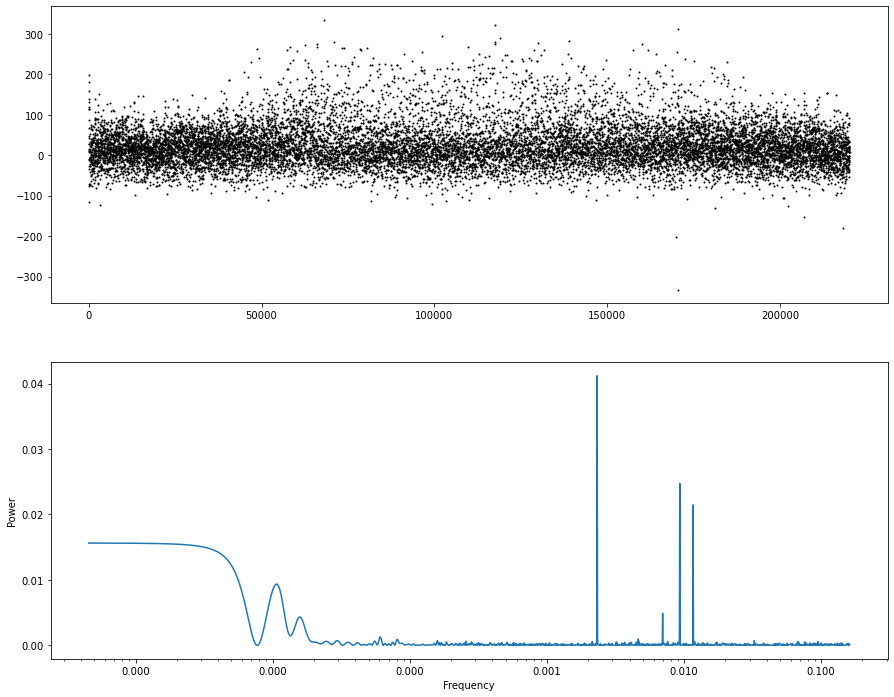

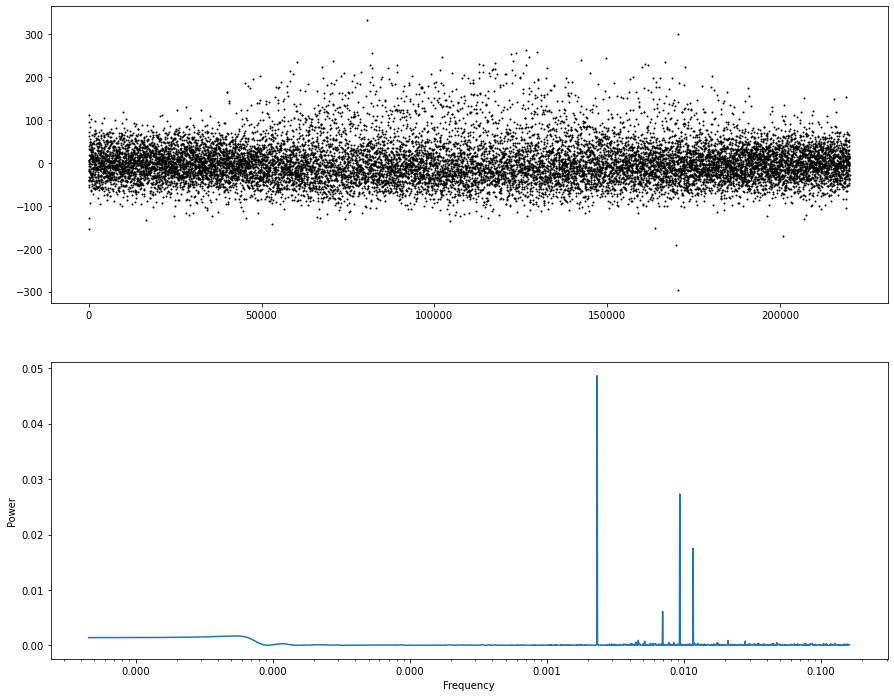

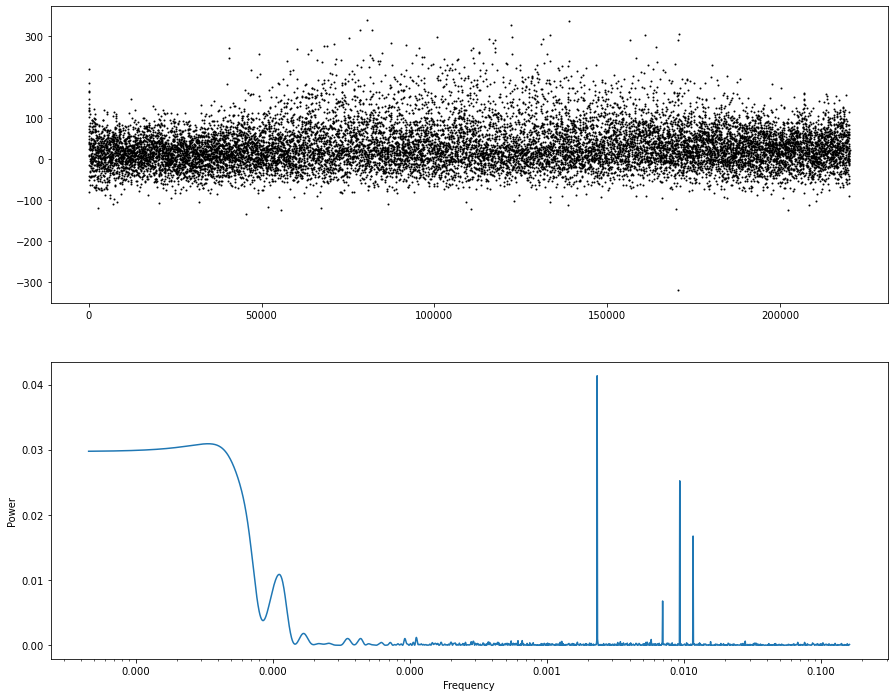

In [88]:
from matplotlib.ticker import ScalarFormatter

frequency_list = []
power_list = []

for num in range(0, len(all_masked_times)):
    x = all_masked_times[num]
    y = all_masked_cols[num]

    # plot with labels and synthetic planet of amplitude 0.78 m/s and 1 year period
    fig, axes = plt.subplots(2,1,figsize=(15, 12))
    ax = axes[0]
    ax.plot(x, y,".", color='k')

    frequency, power = LombScargle(x, y).autopower()
    min_freq = 4.544628249409198e-07 #np.min(frequency)
    max_freq = 0.16088029449191055 #np.max(frequency)
    print("min freq: "+str(min_freq)+" max freq: "+str(max_freq))

    frequency2 = np.geomspace(min_freq, max_freq, 2000)#len(frequency))
    power = LombScargle(x, y).power(frequency2)
    
    frequency_list.append(frequency2)
    power_list.append(power)

    ax = axes[1]
    ax.plot(frequency2, power)
    #plt.xlim(0,100)
    ax.set_xscale('log')
    ax.set_xscale('log')
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    #plt.ylim(-0.005, 0.03)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Power")

    best_frequency = frequency2[np.argmax(power)]
    print("best period: "+str(1/best_frequency))

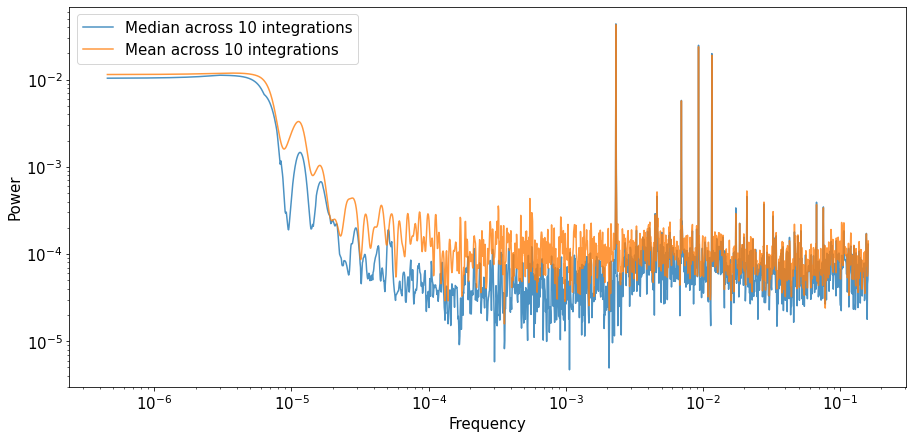

In [89]:
plt.rcParams['font.size'] = 15

med_freq = np.median(frequency_list, axis=0)
med_power = np.median(power_list, axis=0)

mean_freq = np.mean(frequency_list, axis=0)
mean_power = np.mean(power_list, axis=0)


fig, ax = plt.subplots(1,1,figsize=(15, 7))
ax.plot(med_freq, med_power, label="Median across 10 integrations", alpha=0.8)
ax.plot(mean_freq, mean_power, label="Mean across 10 integrations", alpha=0.8)
#ax.plot(mean_freq, (1/(mean_freq)), label="1/f")
ax.set_xscale('log')
ax.set_yscale('log')
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#plt.ylim(-0.005, 0.03)
ax.set_xlabel("Frequency")
ax.set_ylabel("Power")
ax.legend()

In [72]:
write = False# True #

if write:
    import pandas as pd

    # write these results to a csv for later visulation purposes
    data = {'med_freq': med_freq,
           'mean_freq': mean_freq,
            'med_power': med_power,
           'mean_power': mean_power}

    pd_csv = pd.DataFrame(data = data)
    pd_csv.to_csv("med_corr_power_spectrum.csv")

In [46]:
pd_og_powerspectrum

Unnamed: 0      med_freq     mean_freq  med_power  mean_power
0              0  4.544628e-07  4.544628e-07   0.025370    0.025136
1              1  4.573769e-07  4.573769e-07   0.025371    0.025136
2              2  4.603097e-07  4.603097e-07   0.025371    0.025137
3              3  4.632613e-07  4.632613e-07   0.025372    0.025137
4              4  4.662318e-07  4.662318e-07   0.025373    0.025137
...          ...           ...           ...        ...         ...
1995        1995  1.568192e-01  1.568192e-01   0.000096    0.000126
1996        1996  1.578248e-01  1.578248e-01   0.000013    0.000041
1997        1997  1.588368e-01  1.588368e-01   0.000078    0.000092
1998        1998  1.598553e-01  1.598553e-01   0.000066    0.000077
1999        1999  1.608803e-01  1.608803e-01   0.000078    0.000099

[2000 rows x 5 columns]

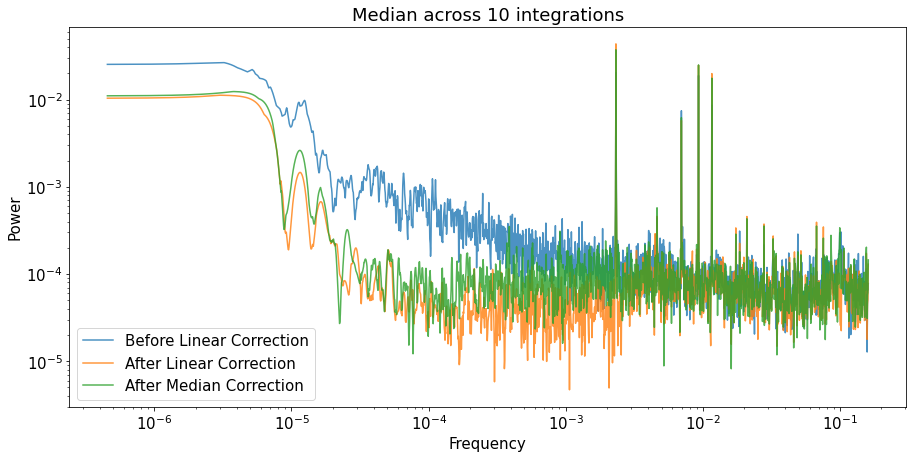

In [91]:
# read in csv from original power spectrum
import pandas as pd

pd_og_powerspectrum = pd.read_csv("original_power_spectrum.csv")
pd_med_powerspectrum = pd.read_csv("med_corr_power_spectrum.csv")



plt.rcParams['font.size'] = 15


fig, ax = plt.subplots(1,1,figsize=(15, 7))
ax.plot(pd_og_powerspectrum['med_freq'], pd_og_powerspectrum['med_power'], label="Before Linear Correction", alpha=0.8)
ax.plot(med_freq, med_power, label="After Linear Correction", alpha=0.8)
ax.plot(pd_med_powerspectrum['med_freq'], pd_med_powerspectrum['med_power'], label="After Median Correction", alpha=0.8)
ax.set_title("Median across 10 integrations")

#ax.plot(mean_freq, (1/(mean_freq)), label="1/f")
ax.set_xscale('log')
ax.set_yscale('log')
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#plt.ylim(-0.005, 0.03)
ax.set_xlabel("Frequency")
ax.set_ylabel("Power")
ax.legend()

In [329]:
len(frequency)

177001

## Line subtraction

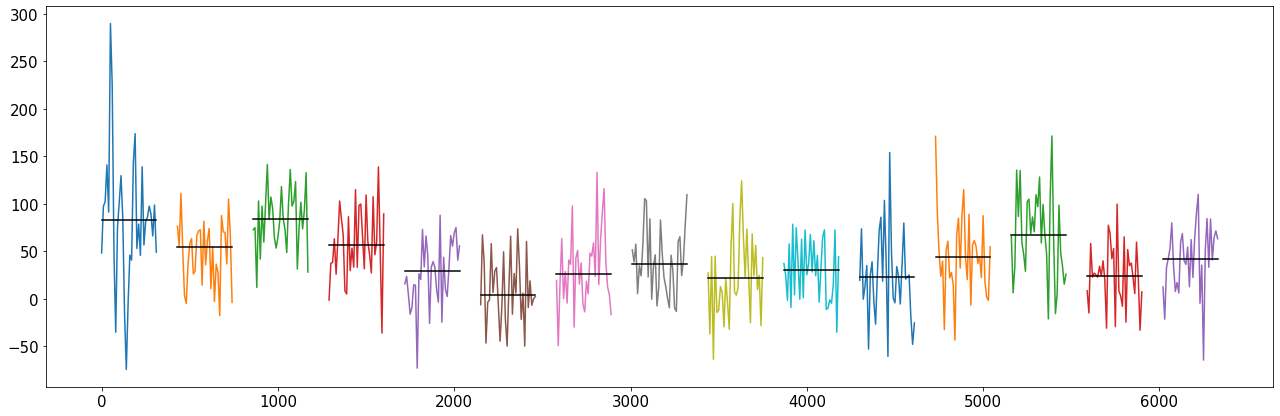

In [330]:
time_np = np.arange(0, 320, 10)

fig, ax = plt.subplots(1,1,figsize=(22, 7))
for number in range(0, 15):#len(col_arrays0)):
    median_col = np.median(col_arrays0[number])
    mean_col = np.mean(col_arrays0[number])
    plt.plot(time_full[number], col_arrays0[number])
    plt.plot(time_full[number], [median_col]*len(time_full[number]), color='k')
    
#fig, ax = plt.subplots(1,1,figsize=(22, 7))
#for number in range(15, 30):#len(col_arrays0)):
#    plt.plot(time_full[number], col_arrays0[number])

In [331]:
np.shape(np.transpose(time_full[number]).reshape((32, 1)))

(32, 1)

In [332]:
np.shape(np.transpose(time_full[number]))

def LS_fit(numbers, col_arrays):

    a_coeff_list = []
    x_list = []
    
    for number in numbers:
        # perform the L-S fit --------------
        n_cols = len(time_full[number])# + 1
        #n_rows = len(ccf_list_np)  # len(ccf_list_np)<---- unsmoothed
        x = np.zeros((32,2))

        x[:, 0] = 1
        x[:, 1] = time_full[number]


        #for i in np.arange(1, 32):
        #    x[:, i] = np.transpose(time_full[number]).reshape((32, 1))[i]  # (for all observations)
        y = col_arrays[number]

        alpha = x.transpose().dot(x)
        beta = x.transpose().dot(y)

        # and finally we can write a_coeff = alpha^-1 * beta
        inv_alpha = np.linalg.inv(alpha)
        a_coeff = inv_alpha.dot(beta)
        a_coeff_list.append(a_coeff.tolist())
        x_list.append(x.tolist())
        
    return a_coeff_list, x_list

In [333]:
def LS_fit_one(time_full, col_arrays):

    # perform the L-S fit --------------
    n_cols = len(time_full)# + 1
    #n_rows = len(ccf_list_np)  # len(ccf_list_np)<---- unsmoothed
    x = np.zeros((32,2))

    x[:, 0] = 1
    x[:, 1] = time_full


    #for i in np.arange(1, 32):
    #    x[:, i] = np.transpose(time_full[number]).reshape((32, 1))[i]  # (for all observations)
    y = col_arrays

    alpha = x.transpose().dot(x)
    beta = x.transpose().dot(y)

    # and finally we can write a_coeff = alpha^-1 * beta
    inv_alpha = np.linalg.inv(alpha)
    a_coeff = inv_alpha.dot(beta)
        
    return a_coeff, x

In [334]:
#x.dot(a_coeff)
a_coeff

array([ 5.90166600e+01, -1.97747798e-02])

In [50]:
numbers_max = 15#512

a_coeff_list, x_list = LS_fit(np.arange(0, numbers_max), col_arrays0)

fig, axes = plt.subplots(2,1,figsize=(22, 7))


ax = axes[0]
for number in range(0, numbers_max):#len(col_arrays0)):
    ax.plot(time_full[number], col_arrays0[number])
    ax.plot(time_full[number], np.array(x_list[number]).dot(a_coeff_list[number]), color='k')

#ax.set_xlim(40000, 50000)
    
ax = axes[1]
number = 0
ax.plot(time_full[number], col_arrays0[number]-np.array(x_list[number]).dot(a_coeff_list[number]), 
            label="residuals", color='b')
for number in range(1, numbers_max):#len(col_arrays0)):
    ax.plot(time_full[number], col_arrays0[number]-np.array(x_list[number]).dot(a_coeff_list[number]), 
            color='b')

ax.legend()

NameError: name 'LS_fit' is not defined

In [337]:
len(col_arrays0)

512

In [338]:
len(col_arrays0[number])

32

## Visualize images before correction

0
1
2
3
4
5
6
7
8
9


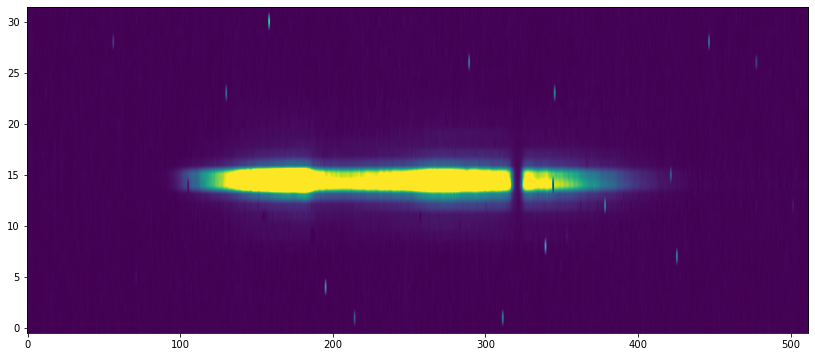

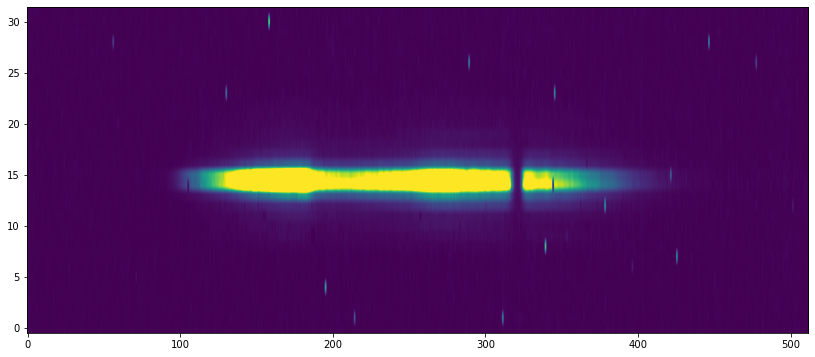

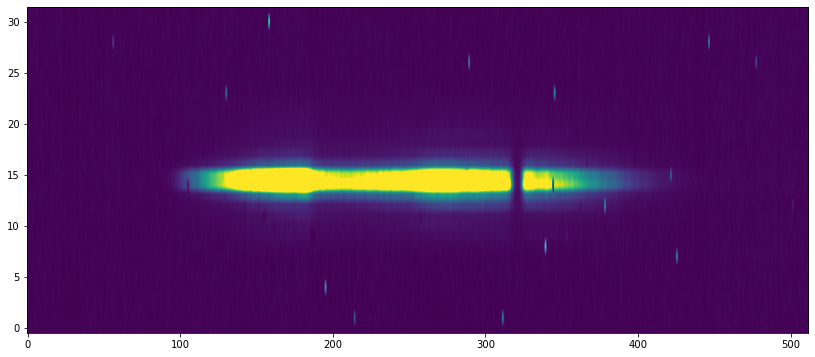

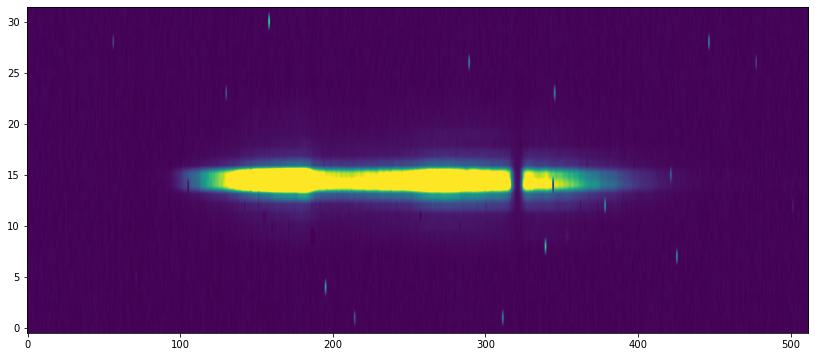

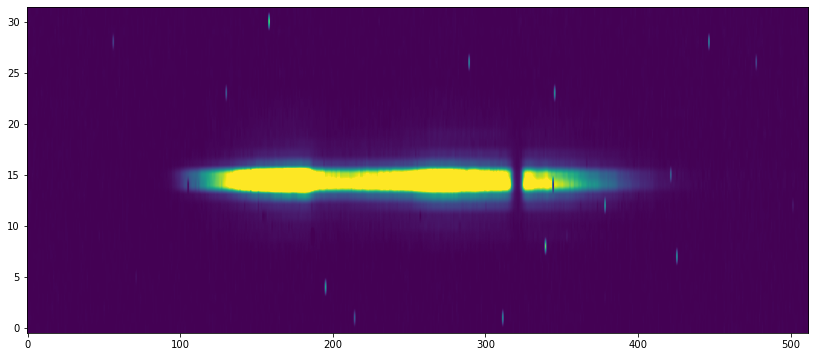

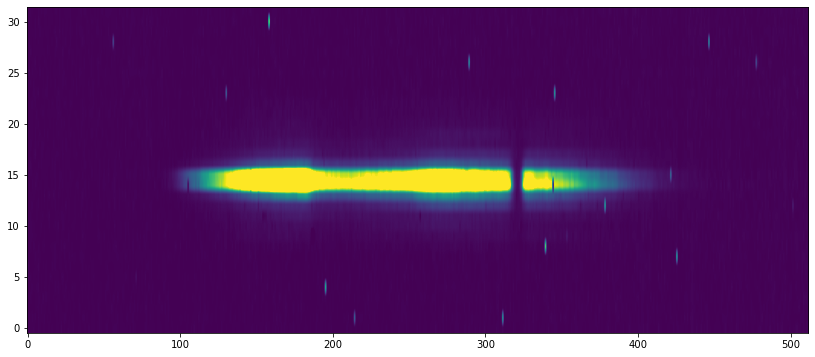

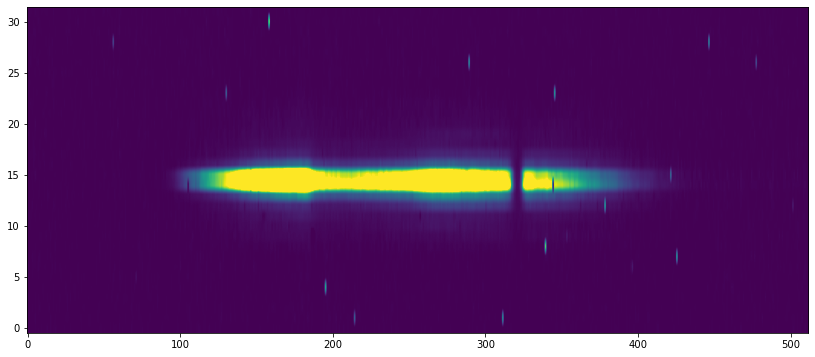

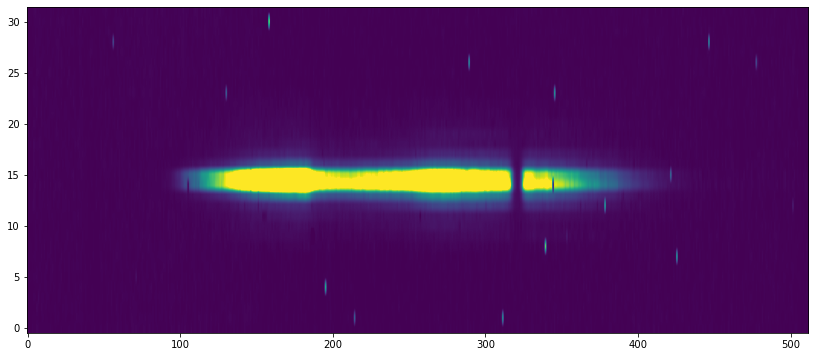

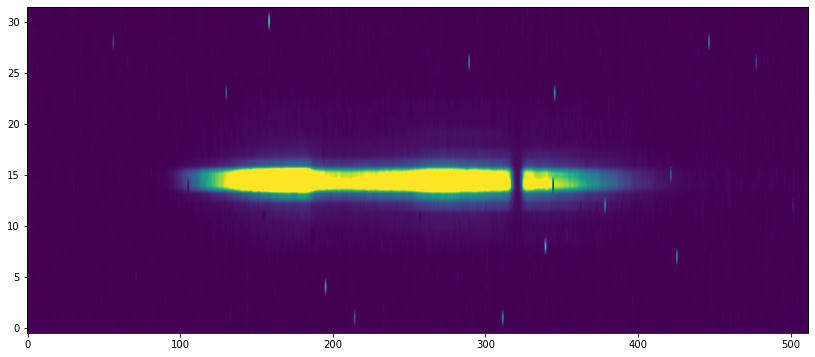

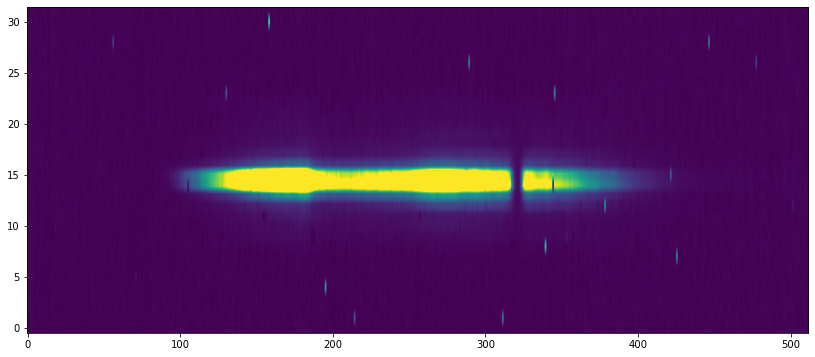

In [339]:
%matplotlib inline
for i in range(0, 10):
    print(i)
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    plt.imshow(hdul[1].data[i,1,:,:,], origin = 'lower', aspect='auto',  vmin=0, vmax=1e4)

In [340]:
np.shape(hdul[1].data[:,:,:,:,])

(10, 3, 32, 512)

In [341]:
# apply linear correction

def lin_corr(integr_nums, group_nums, colsize, rowsize):
    col_corr_arrays = []
    col_values_list =[]
    image =  np.zeros((10, 3, 32, 512))
    image_corr = np.zeros((10, 3, 32, 512))
    
    for group_num in range(0, group_nums):
        for integr_num in range(0, integr_nums):
            for col_num in range(0, rowsize):
                    #print(integr_num,group_num,col_num)
                    col_values= hdul[1].data[integr_num,group_num,:,col_num]
                    image[integr_num,group_num,:,col_num] = hdul[1].data[integr_num,group_num,:,col_num]
                    col_values_list.append(col_values)
                    a_coeff, x = LS_fit_one(time_full[col_num], col_values)
                    col_corr_values = col_values - np.array(x).dot(a_coeff)
                    col_corr_arrays.append(col_corr_values.tolist())
                    
                    #fig, axes = plt.subplots(2, 1, figsize=(8, 3), gridspec_kw={'height_ratios': [2, 1.5]})
                    
                    #ax = axes[0]
                    #ax.plot(time_full[col_num], hdul[1].data[integr_num,group_num,:,col_num], label="raw")
                    #ax.plot(time_full[col_num], np.array(x).dot(a_coeff), label="lin corr")
                    #ax.legend()
                    
                    #ax = axes[1]
                    #ax.plot(time_full[col_num], col_corr_values, label ="corrected")
                    #ax.set_ylabel("Residuals")
                    #ax.legend()
                    
                    image_corr[integr_num,group_num,:,col_num] = col_corr_values
                    #print(image_corr)
                    
    
    #col_arrays_flat = [item for sublist in col_arrays for item in sublist]
    
    return col_corr_arrays, col_values_list, image, image_corr

In [342]:
col_corr_arrays, col_values_list,image, image_corr = lin_corr(integr_nums=10, group_nums=3, colsize=1, rowsize=512)

In [345]:
image_corr[0,0,:,0]
image_corr[1,0,:,0]
image_corr[9,2,:,511]

image_corr

array([[[[-5.10925140e+01,  2.56588586e+01, -3.55468958e+00, ...,
           1.07447225e+01,  2.60732685e+01,  1.53745859e+00],
         [-1.04299878e+00,  4.96964347e+00, -1.85999862e+00, ...,
          -1.01001078e+01,  3.62870460e+00, -1.07950176e+01],
         [ 5.08842567e+00,  6.06942467e+01, -6.51823975e+01, ...,
           4.72340170e+01, -1.70734277e+01, -6.63359738e+00],
         ...,
         [-2.26033118e+00,  5.98266502e+01,  3.64139713e+00, ...,
           3.19332422e+01,  3.05273499e+01,  1.24123716e+01],
         [ 3.14213862e+01,  2.17570640e+01,  4.24402141e+01, ...,
          -2.19021887e+01,  6.21335673e+01, -1.53995358e+01],
         [-1.71117401e+01, -4.83051980e+01, -6.25158518e+01, ...,
          -1.15407202e+01,  6.64685443e+01, -2.47585623e+01]],

        [[-6.60243322e+01,  2.28747677e+01,  3.22371951e+00, ...,
           3.39890408e+01,  2.33857685e+01,  9.18518583e+00],
         [-1.53622803e+01,  1.18046875e+01,  1.44278730e+00, ...,
          -4.11147131e

In [346]:
print(np.shape(hdul[1].data[:,:,:,:]))
np.shape(image_corr)

(10, 3, 32, 512)


(10, 3, 32, 512)

0
1
2
3
4
5
6
7
8
9


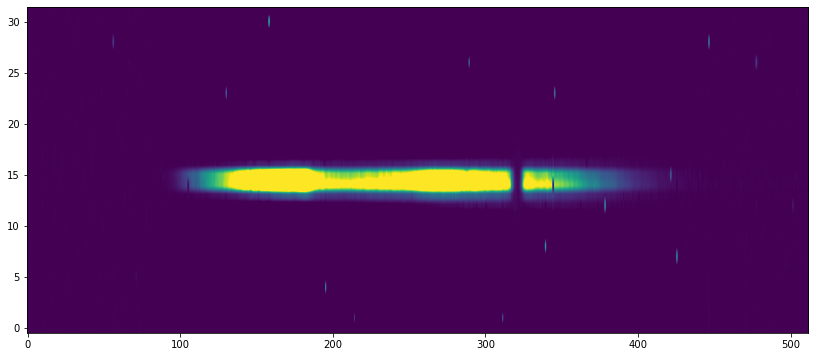

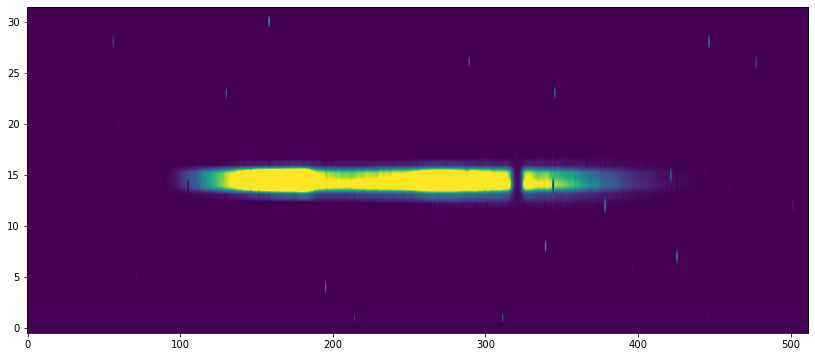

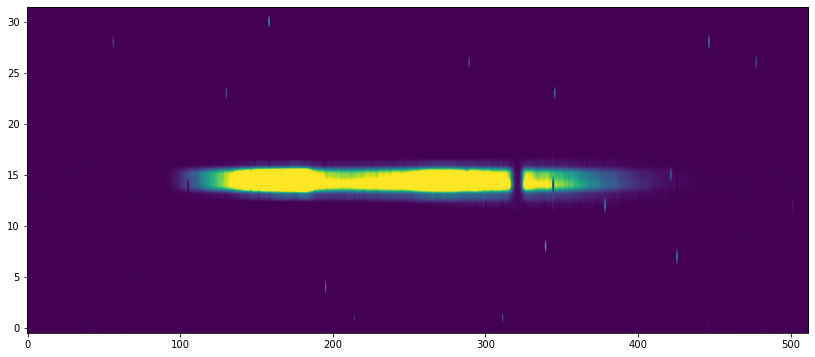

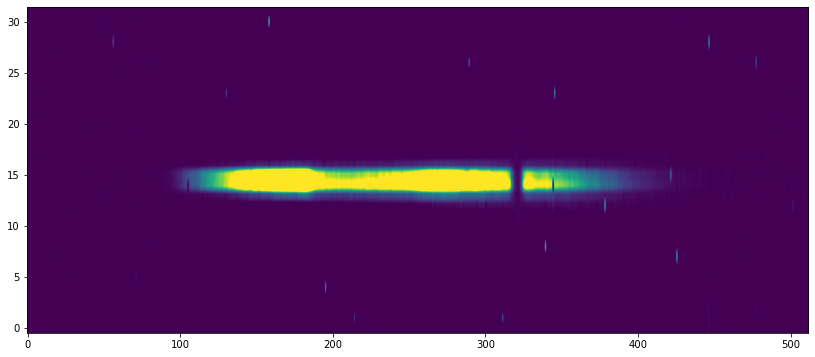

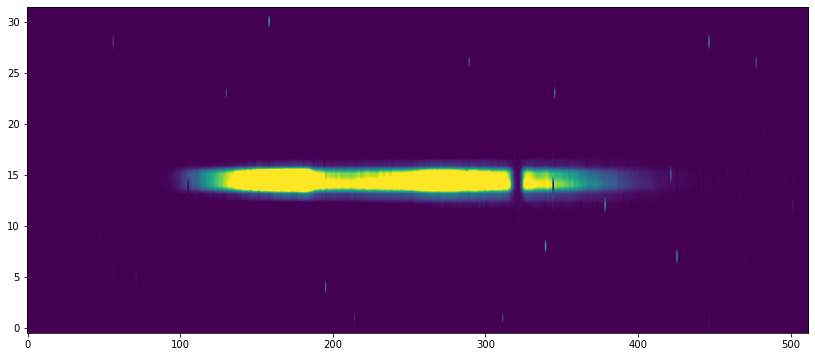

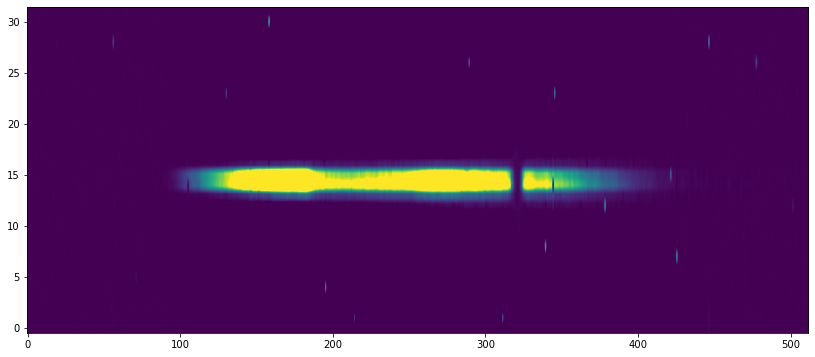

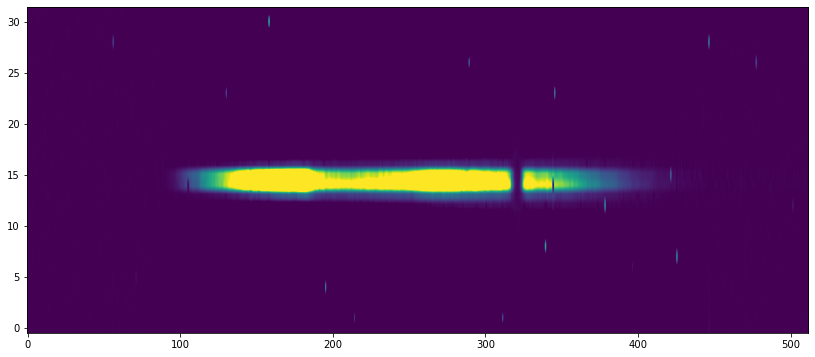

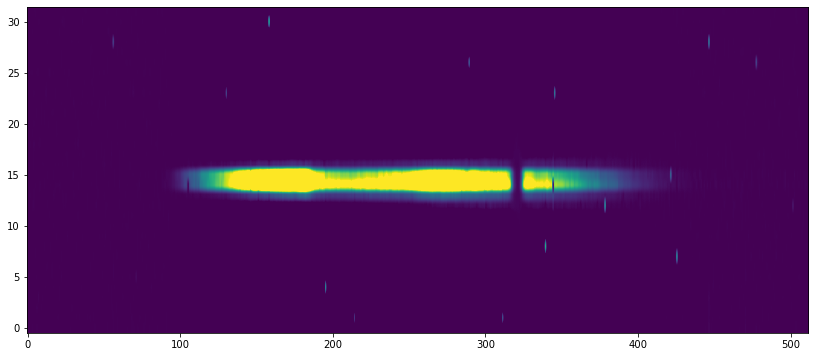

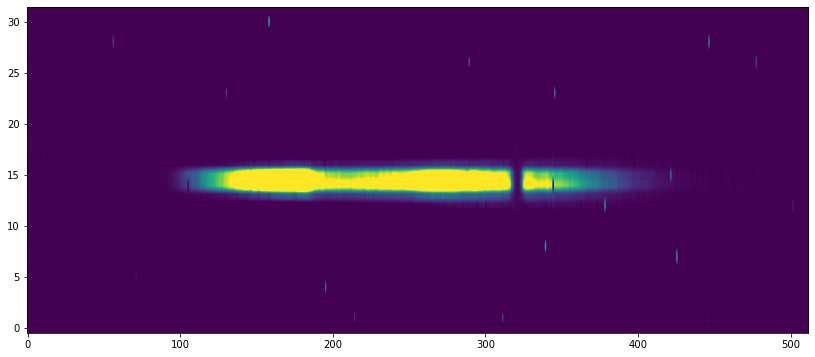

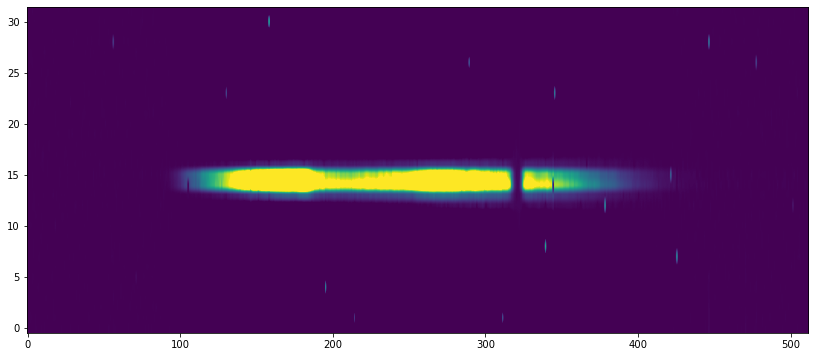

In [349]:
image_corr

%matplotlib inline
for i in range(0, 10):
    print(i)
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    plt.imshow(image_corr[i,1,:,:,], origin = 'lower', aspect='auto',  vmin=0, vmax=1e4)

In [194]:
col_values= hdul[1].data[integr_num,group_num,:,col_num]
a_coeff, x = LS_fit_one(time_full[col_num], col_values)

col_values

array([ 76.17236 ,  55.2854  , 110.812256,  51.60547 ,   3.052246,
        -5.154541,  35.532227,  57.990723,  63.292236,  25.965332,
        28.771484,  66.22119 ,  71.372314,  72.36548 ,  14.185303,
        81.569336,  35.612305,  61.165527,  73.97217 ,  10.485352,
        54.402344,  -2.994629,  36.28247 ,  27.429688, -18.005615,
        87.50122 ,  70.29224 ,  69.64526 ,  36.500366, 104.60547 ,
        66.338135,  -3.921875], dtype=float32)

In [220]:
hdul[1].data[integr_num,group_num,:,col_num]

array([ 76.17236 ,  55.2854  , 110.812256,  51.60547 ,   3.052246,
        -5.154541,  35.532227,  57.990723,  63.292236,  25.965332,
        28.771484,  66.22119 ,  71.372314,  72.36548 ,  14.185303,
        81.569336,  35.612305,  61.165527,  73.97217 ,  10.485352,
        54.402344,  -2.994629,  36.28247 ,  27.429688, -18.005615,
        87.50122 ,  70.29224 ,  69.64526 ,  36.500366, 104.60547 ,
        66.338135,  -3.921875], dtype=float32)

In [359]:
hdul[1].data = image_corr

In [360]:
hdul[1].data

array([[[[-5.10925140e+01,  2.56588586e+01, -3.55468958e+00, ...,
           1.07447225e+01,  2.60732685e+01,  1.53745859e+00],
         [-1.04299878e+00,  4.96964347e+00, -1.85999862e+00, ...,
          -1.01001078e+01,  3.62870460e+00, -1.07950176e+01],
         [ 5.08842567e+00,  6.06942467e+01, -6.51823975e+01, ...,
           4.72340170e+01, -1.70734277e+01, -6.63359738e+00],
         ...,
         [-2.26033118e+00,  5.98266502e+01,  3.64139713e+00, ...,
           3.19332422e+01,  3.05273499e+01,  1.24123716e+01],
         [ 3.14213862e+01,  2.17570640e+01,  4.24402141e+01, ...,
          -2.19021887e+01,  6.21335673e+01, -1.53995358e+01],
         [-1.71117401e+01, -4.83051980e+01, -6.25158518e+01, ...,
          -1.15407202e+01,  6.64685443e+01, -2.47585623e+01]],

        [[-6.60243322e+01,  2.28747677e+01,  3.22371951e+00, ...,
           3.39890408e+01,  2.33857685e+01,  9.18518583e+00],
         [-1.53622803e+01,  1.18046875e+01,  1.44278730e+00, ...,
          -4.11147131e

In [355]:
image_corr

array([[[[-5.10925140e+01,  2.56588586e+01, -3.55468958e+00, ...,
           1.07447225e+01,  2.60732685e+01,  1.53745859e+00],
         [-1.04299878e+00,  4.96964347e+00, -1.85999862e+00, ...,
          -1.01001078e+01,  3.62870460e+00, -1.07950176e+01],
         [ 5.08842567e+00,  6.06942467e+01, -6.51823975e+01, ...,
           4.72340170e+01, -1.70734277e+01, -6.63359738e+00],
         ...,
         [-2.26033118e+00,  5.98266502e+01,  3.64139713e+00, ...,
           3.19332422e+01,  3.05273499e+01,  1.24123716e+01],
         [ 3.14213862e+01,  2.17570640e+01,  4.24402141e+01, ...,
          -2.19021887e+01,  6.21335673e+01, -1.53995358e+01],
         [-1.71117401e+01, -4.83051980e+01, -6.25158518e+01, ...,
          -1.15407202e+01,  6.64685443e+01, -2.47585623e+01]],

        [[-6.60243322e+01,  2.28747677e+01,  3.22371951e+00, ...,
           3.39890408e+01,  2.33857685e+01,  9.18518583e+00],
         [-1.53622803e+01,  1.18046875e+01,  1.44278730e+00, ...,
          -4.11147131e

In [358]:
from astropy.io.fits import getheader
hdr = getheader("dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS.fits", 0) 
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-03-21T19:37:31.874' / UTC date file created                     
ORIGIN  = 'STScI   '           / Organization responsible for creating file     
FILENAME= 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp.fits' / Na
FILETYPE= 'countrate'          / Type of data in the file                       
SDP_VER = 'B7.0    '           / Data processing software version number        
CAL_VER = '1.3.3   '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '        

In [361]:
hdul.writeto('dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS_add_lin_corr.fits')